In [93]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [94]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


# Linear Regression

In [95]:
predict = "G3"

X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)


"""best = 0
for _ in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        # saves model
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)"""

'best = 0\nfor _ in range(30):\n\n    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)\n\n    linear = linear_model.LinearRegression()\n\n    linear.fit(x_train, y_train)\n\n    acc = linear.score(x_test, y_test)\n    print(acc)\n\n    if acc > best:\n        best = acc\n        # saves model\n        with open("studentmodel.pickle", "wb") as f:\n            pickle.dump(linear, f)'

In [96]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [97]:
print("Coefficient:", linear.coef_)
print("Intercept:", linear.intercept_)


Coefficient: [ 0.15087756  0.99090828 -0.16210898 -0.1999162   0.04490664]
Intercept: -1.7290313570563693


In [98]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

13.949270001273627 [14 14  3  0  4] 14
15.62721563892614 [17 15  1  0  2] 15
13.798392445541946 [13 14  3  0  4] 14
7.921068119043399 [7 9 2 0 0] 8
14.721950304536053 [11 15  1  0  2] 15
9.063458014060918 [11  9  2  0 12] 9
8.458587854293349 [8 9 1 0 5] 9
18.44411765411529 [18 18  4  0  6] 18
-1.7365011608088343 [5 0 1 3 0] 0
16.154259828160733 [15 16  2  0  2] 16
5.794660143756001 [7 7 4 0 4] 6
15.466466592953216 [16 15  3  0  9] 16
-0.9971064325621433 [7 0 2 0 0] 0
13.495881453011851 [15 13  2  0  9] 15
11.337971477127724 [12 11  1  1 16] 12
8.30140508210647 [10  9  3  0  2] 9
8.30140508210647 [10  9  3  0  2] 8
8.525938278810969 [10  9  3  0  7] 9
10.535143910625495 [10 11  2  0  4] 9
8.582076345233958 [9 9 2 0 8] 9
14.922660710235528 [14 15  2  0  0] 15
8.161758953456879 [8 9 2 0 2] 8
8.373700786238443 [10  9  2  0  0] 9
11.961167286782436 [13 12  1  0  0] 12
10.274767489484024 [12 10  2  1 18] 10
8.01148545349931 [10  8  2  0 14] 9
4.710619851590589 [7 6 1 2 0] 0
5.918771759458181

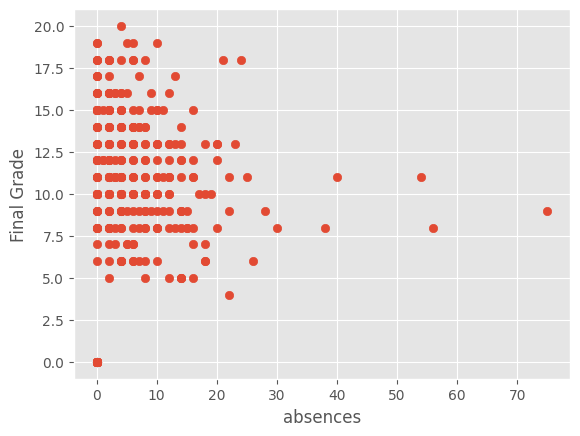

In [103]:
p = "absences"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()